$$\theta_{LS} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$


Global minimum may not be found. Analytical approach does

In [8]:
from sklearn.datasets import make_regression
import numpy as np

# Set seed of data
np.random.seed(0)

X, y = make_regression(n_samples=100, n_features=1, noise=20)

X = np.interp(X, (X.min(), X.max()), (20, 80))
y = np.interp(y, (y.min(), y.max()), (100, 500))

X = np.hstack((np.ones(shape=(len(X), 1)), X))

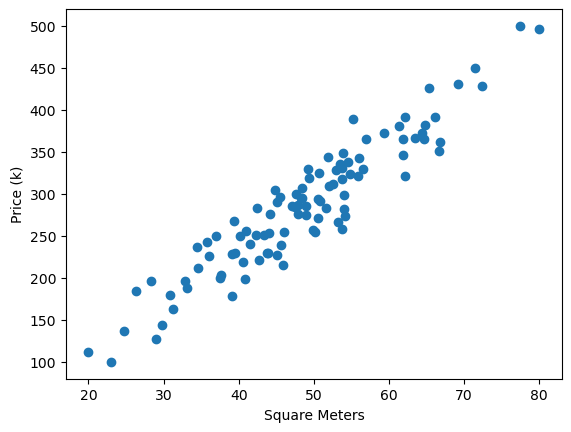

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y)
plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()

In [13]:
def calc_gradient(thetas, x, y):
    y_hat = x.dot(thetas).flatten()
    error = y.flatten() - y_hat
    gradient = -(1.0/len(x)) * error.dot(x)
    
    mse = np.mean(error**2)
    
    return gradient, mse

thetas = [0, 0]
iter_count = 0
lr = 0.0001
tolerance = 0.001

while True:
    gradient, error = calc_gradient(thetas, X, y)
    thetas_hat = thetas - lr * gradient
    
    if np.sum(abs(thetas_hat - thetas)) < tolerance:
        print('Converged')
        break
        
    thetas = thetas_hat
    
    if iter_count % 10 == 0:
        print('Iteration: %i - error %.3f' % (iter_count, error))
        
    iter_count += 1
    
    

Iteration: 0 - error 87964.370
Iteration: 10 - error 963.819
Iteration: 20 - error 695.470
Converged


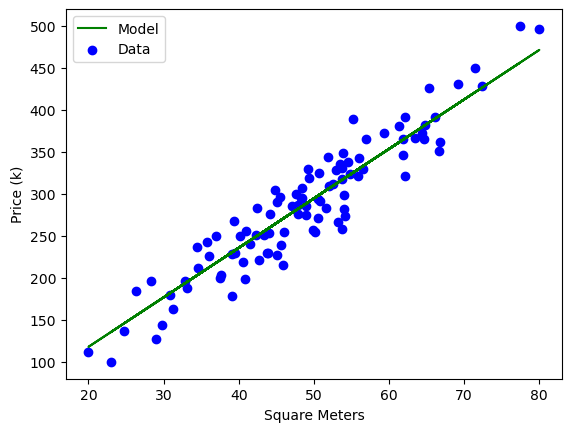

In [14]:
y_hat = X.dot(thetas)

plt.plot(X[:,1], y_hat, c='g', label='Model')
plt.scatter(X[:,1], y, c='b', label='Data')

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()




In [15]:
new_x = np.array([[1, 75], [1, 120]])
new_y_hat = new_x.dot(thetas)
new_y_hat

array([441.99449677, 707.12386486])

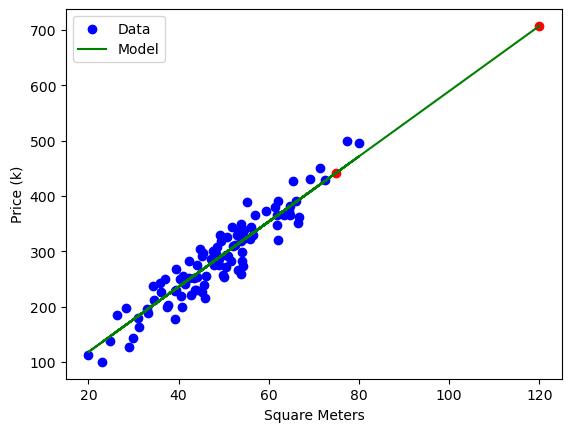

In [18]:
plt.scatter(X[:,1], y, c='b', label='Data')

X_cat = np.concatenate((X, new_x))
y_cat = np.concatenate((y_hat, new_y_hat))

plt.plot(X_cat[:,1], y_cat, c='g', label='Model')
plt.scatter(new_x[:,1], new_y_hat, c='r')

plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X[:,1].reshape(-1,1), y)

In [25]:
y_hat = X.dot(thetas)
y_hat2 = regr.predict(X[:,1].reshape(-1,1))

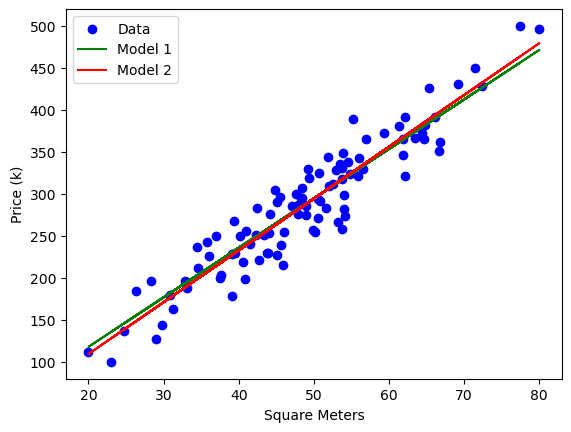

In [27]:
plt.scatter(X[:,1], y, c='b', label='Data')

plt.plot(X[:,1], y_hat, c='g', label='Model 1')
plt.plot(X[:,1], y_hat2, c='r', label='Model 2')
plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()
